# Visualizing Results from Various IMDB CausalSent Experiments

### Not very useful TBH hahah, ended up doing by hand 

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from typing import List, Optional

In [2]:
def visualize_experiment(experiment_name: str, 
                        estimated_effects: List[float],
                        sentiment_accuracies: List[float],
                        sentiment_f1s: List[float],
                        true_effect: Optional[float] = None):
    """
    Generate and display plots of experiment results.
    
    Parameters:
    - experiment_name: str
        Name of the experiment being visualized.
    - estimated_effects: List[float]
        List of estimated treatment effects for each run of the experiment.
    - sentiment_accuracies: List[float]
        List of sentiment classification accuracies corresponding to the runs.
    - sentiment_f1s: List[float]
        List of sentiment classification F1 scores corresponding to the runs.
    - true_effect: Optional[float], default=None
        The true causal effect, if known, to use as a reference.
    """
    # Ensure the input lists are of the same length
    assert len(estimated_effects) == len(sentiment_accuracies) == len(sentiment_f1s), \
        "All input lists must have the same length."

    # Create a consistent color palette for each experiment run
    num_points = len(estimated_effects)
    colors = sns.color_palette("husl", num_points)

    # Plot distribution of estimated effects
    plt.figure(figsize=(12, 6))
    sns.histplot(estimated_effects, kde=True, color="skyblue", bins=20, label="Estimated Effects")
    if true_effect is not None:
        plt.axvline(true_effect, color="red", linestyle="--", linewidth=2, label=f"True Effect ({true_effect:.2f})")
    plt.title(f"Distribution of Estimated Effects - {experiment_name}")
    plt.xlabel("Estimated Effect")
    plt.ylabel("Density")
    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

    # Plot sentiment accuracies and F1 scores
    x_ticks = np.arange(num_points)

    plt.figure(figsize=(12, 6))
    plt.scatter(x_ticks, sentiment_accuracies, label="Sentiment Accuracy", color="blue", s=50)
    plt.scatter(x_ticks, sentiment_f1s, label="Sentiment F1 Score", color="green", s=50)
    plt.title(f"Sentiment Model Performance - {experiment_name}")
    plt.xlabel("Experiment Run Index")
    plt.ylabel("Performance Metric")
    plt.xticks(x_ticks)
    plt.ylim(0, 1)  # Assuming metrics are in [0, 1]
    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

## Semi-Synthetic ATEs + Simultaneous Learning


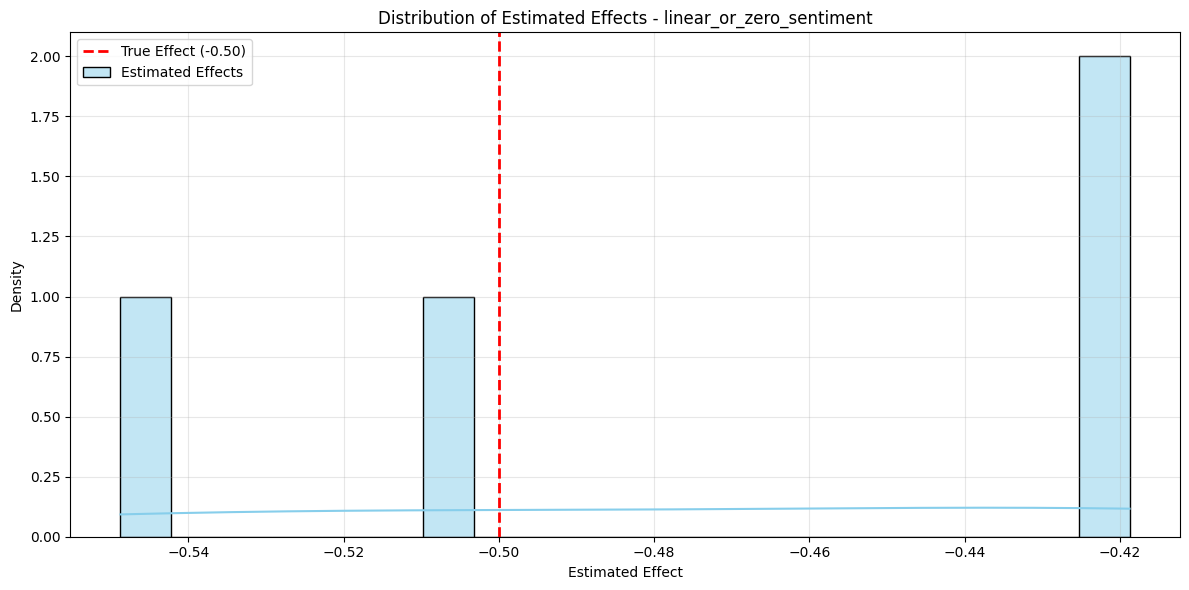

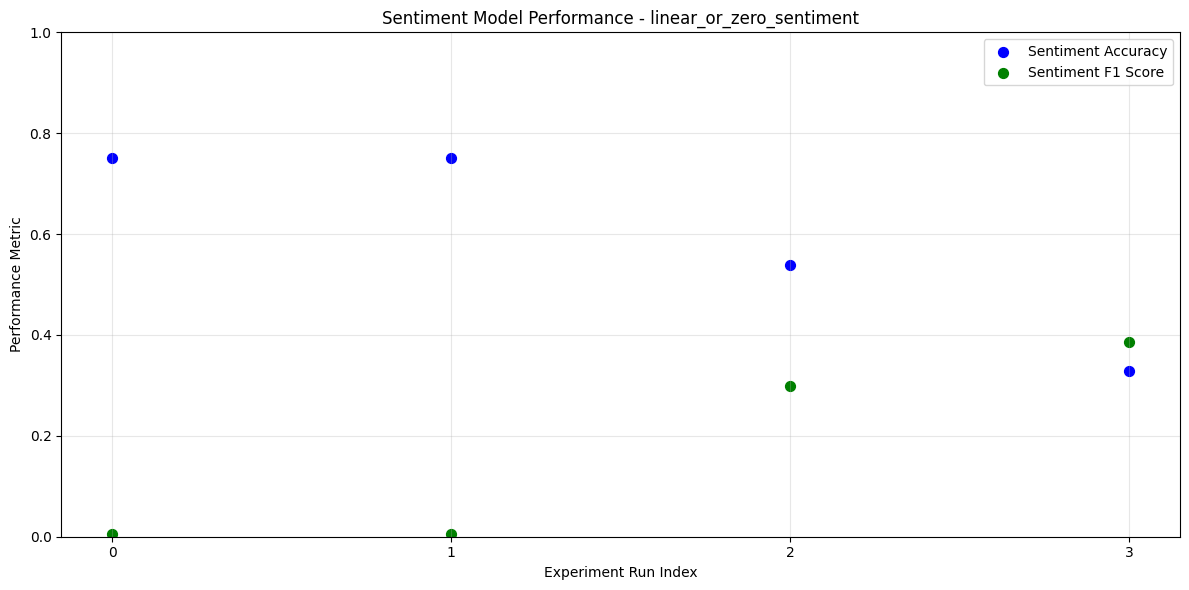

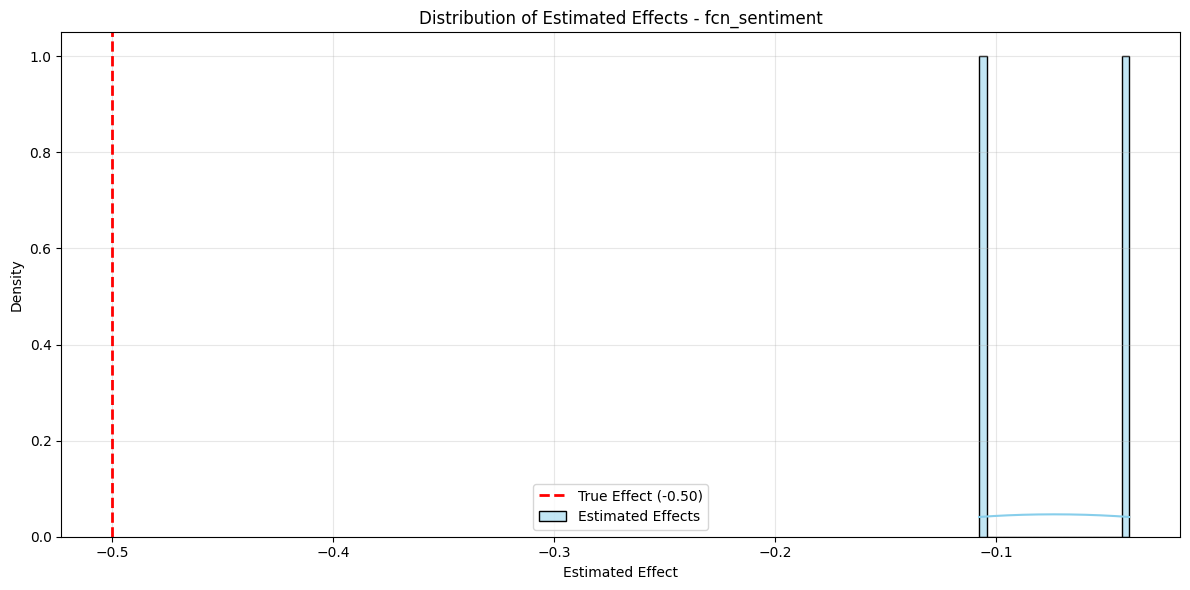

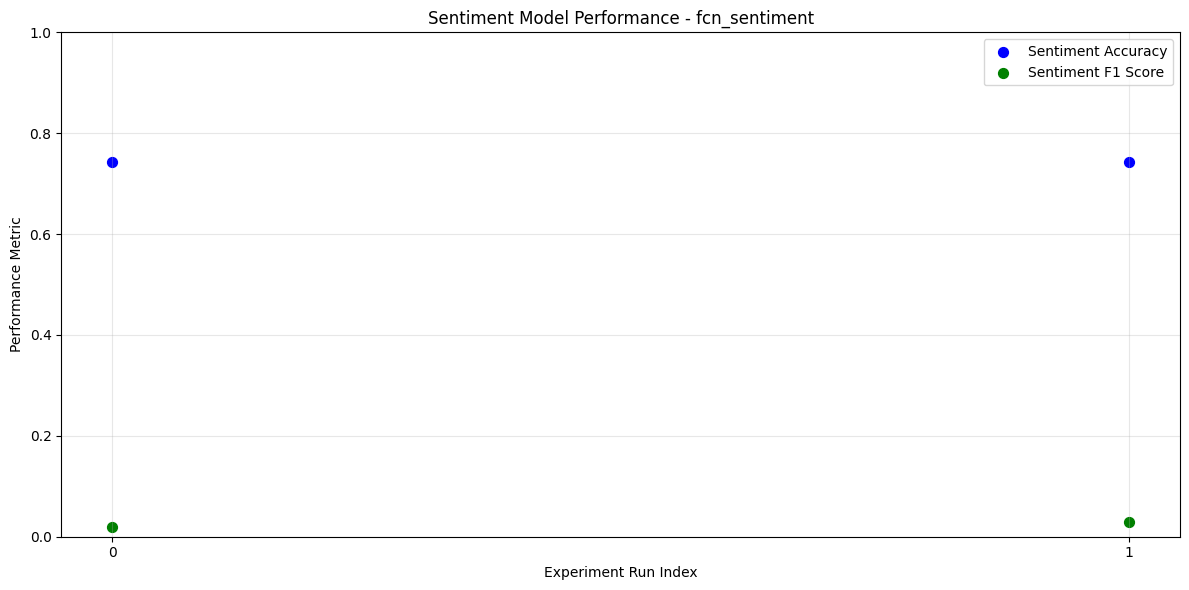

In [3]:
experiment_name = "linear_or_zero_sentiment"
true_effect = -0.5
results = {
    "volcanic": {
        "estimated_effect": -0.41877,
        "validation_accuracy": 0.7508,
        "validation_f1": 0.0063796,
    },
    "stilted": {
        "estimated_effect": -0.41889,
        "validation_accuracy": 0.7508,
        "validation_f1": 0.0063796,
    },
    "winter": {
        "estimated_effect": -0.50788,
        "validation_accuracy": 0.538,
        "validation_f1": 0.29872,
    },
    "major": {
        "estimated_effect": -0.54873,
        "validation_accuracy": 0.328,
        "validation_f1": 0.38507,
    },
}

results_fcn = {
    "radiant": {
        "estimated_effect": -0.10779,
        "validation_accuracy": 0.7428,
        "validation_f1": 0.018321,
    },
    "magic": {
        "estimated_effect": -0.039916,
        "validation_accuracy": 0.7424,
        "validation_f1": 0.03012,
    },
}

# Extract values from the results dictionary
estimated_effects = [result["estimated_effect"] for result in results.values()]
sentiment_accuracies = [result["validation_accuracy"] for result in results.values()]
sentiment_f1s = [result["validation_f1"] for result in results.values()]

# no FCN
visualize_experiment(
    experiment_name=experiment_name,
    estimated_effects=estimated_effects,
    sentiment_accuracies=sentiment_accuracies,
    sentiment_f1s=sentiment_f1s,
    true_effect=true_effect
)

estimated_effects = [result["estimated_effect"] for result in results_fcn.values()]
sentiment_accuracies = [result["validation_accuracy"] for result in results_fcn.values()]
sentiment_f1s = [result["validation_f1"] for result in results_fcn.values()]

#non-zero FCN
visualize_experiment(
    experiment_name="fcn_sentiment",
    estimated_effects=estimated_effects,
    sentiment_accuracies=sentiment_accuracies,
    sentiment_f1s=sentiment_f1s,
    true_effect=true_effect
)

## Semi-Synthetic ATEs + Interleaved Learning


## Semi-Synthetic ATEs + Interleaved Learning + Embedding Learning


## Semi-Synthetic ATT + Interleaved Learning


## Observational Data + Interleaved Learning [ATE]


## Observational Data + Interleaved Learning [ATT]
